# Tyson Miller
## 02-05-2020

In [2]:


import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
from random import sample
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns

In [80]:
# reading the robbery data
r_df=pd.read_csv("Robbery.csv")
len(r_df)

265344

In [81]:
# reading the arson data
a_df=pd.read_csv("Arson.csv")
len(a_df)

11604

In [82]:
# reading the motor vehicle theft data
mvt_df=pd.read_csv("MVT.csv")
len(mvt_df)

324955

### Question 1 - Missing Data ###

In [83]:
## Checking to see where the missing data is
r_df.isnull().sum()

Unnamed: 0                  0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        4
Arrest                      0
Domestic                    0
Beat                        0
District                    5
Ward                    23251
Community Area          23270
X Coordinate             1433
Y Coordinate             1433
Year                        0
Updated On                  0
Latitude                 1433
Longitude                1433
dtype: int64

In [84]:
r_df = r_df.sort_values(['Community Area', 'Beat'])
## Grouping by Police Beat to fill the missing values
g1 = r_df.groupby(['Beat'])

r_df['Community Area'] = g1['Community Area'].ffill()

# resort back by index
r_df = r_df.sort_index(0)

In [85]:
r_df.isnull().sum()

Unnamed: 0                  0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        4
Arrest                      0
Domestic                    0
Beat                        0
District                    5
Ward                    23251
Community Area              0
X Coordinate             1433
Y Coordinate             1433
Year                        0
Updated On                  0
Latitude                 1433
Longitude                1433
dtype: int64

*The robbery dataframe has 1433 rows that are missing the X coordinate and Y coordinate of the robbery as well as the Latitude and Longitude. This makes sense because those are basically the same thing so if a row is missing the X and Y coordinate they should be missing the Latitude and Longitude as well. There are 23251 rows which are missing the Ward and 23270 rows which are missing the community area. These are other measures of location and since there are many rows which have the coordinates and not the community area, we should be able to use the coordinates to tell which community area the crime took place in so it is possible to recover many of these missing data points exactly. Using a forward filling method, we filled in Community Area Data by grouping the dataframe by police beat then forward filling community area so that an NaN value was replaced with a value for community area that had appeared previously for a certain beat. This provides at best a good approximation of community area because a police beat is a much more precise measurement of location so if not an exact community area we will at least get an adjacent one.*

### Question 2 - Temporal Trends in Chicago Crime Data ###

In [86]:
r_df['Date'] = pd.to_datetime(r_df['Date'])
a_df['Date'] = pd.to_datetime(a_df['Date'])
mvt_df['Date'] = pd.to_datetime(mvt_df['Date'])

In [87]:
r_df = r_df.set_index('Date')
a_df = a_df.set_index('Date')
mvt_df = mvt_df.set_index('Date')

In [88]:
annual_r_df = r_df.resample('M').count()['Block']
annual_a_df = a_df.resample('M').count()['Block']
annual_mvt_df = mvt_df.resample('M').count()['Block']

In [89]:
r_decomposition = sm.tsa.seasonal_decompose(annual_r_df)
a_decomposition = sm.tsa.seasonal_decompose(annual_a_df)
mvt_decomposition = sm.tsa.seasonal_decompose(annual_mvt_df)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


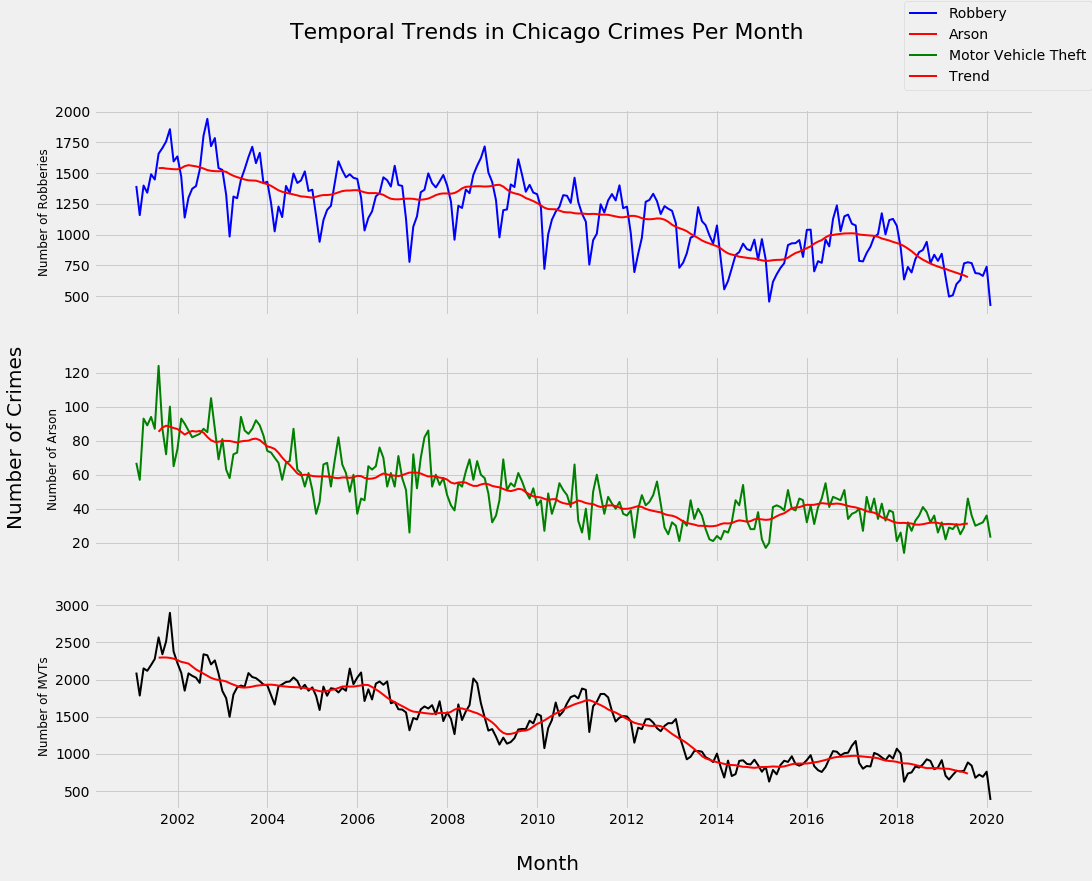

In [91]:
fig, axs = plots.subplots(nrows = 3, ncols = 1, sharex = True)
#rcParams['figure.figsize'] = [15, 12]

fig.suptitle('Temporal Trends in Chicago Crimes Per Month', fontsize = 22)

l1 = axs[0].plot(annual_r_df.index, annual_r_df, linewidth = 2, c='blue')
l2 = axs[0].plot(r_decomposition.trend.index, r_decomposition.trend, linewidth = 2, c='red')
axs[0].set_ylabel('Number of Robberies', fontsize = 12);

l3 = axs[1].plot(annual_a_df.index, annual_a_df, linewidth = 2, c='green')
l4 = axs[1].plot(a_decomposition.trend.index, a_decomposition.trend, linewidth = 2, c='red')
axs[1].set_ylabel('Number of Arson', fontsize = 12);

l5 = axs[2].plot(annual_mvt_df.index, annual_mvt_df, linewidth = 2, c='black')
l6 = axs[2].plot(mvt_decomposition.trend.index, mvt_decomposition.trend, linewidth = 2, c='red')
axs[2].set_ylabel('Number of MVTs', fontsize = 12);

fig.text(0.5, 0, 'Month', ha='center', fontsize = 20)
fig.text(0, 0.5, 'Number of Crimes', va='center', rotation='vertical', fontsize = 20)
line_labels = ["Robbery", "Arson", "Motor Vehicle Theft", "Trend"]

fig.legend([l1, l3, l5, l2],labels=line_labels, loc="upper right", borderaxespad=0.1)

plots.figsize = (10,10)
plots.show()

In [92]:
r_df.loc[(r_df['Community Area'] == 1) | (r_df['Community Area'] == 2) | (r_df['Community Area'] == 3) | (r_df['Community Area'] == 4) | 
          (r_df['Community Area'] == 9) | (r_df['Community Area'] == 10) | (r_df['Community Area'] == 11) | (r_df['Community Area'] == 12) | 
          (r_df['Community Area'] == 13) | (r_df['Community Area'] == 14) | (r_df['Community Area'] == 76) | (r_df['Community Area'] == 77) , 'Side'] = 'Far North' 

In [93]:
r_df.loc[(r_df['Community Area'] == 5) | (r_df['Community Area'] == 6) | (r_df['Community Area'] == 7) |
        (r_df['Community Area'] == 21) | (r_df['Community Area'] == 22), 'Side'] = 'North'

In [94]:
r_df.loc[(r_df['Community Area'] == 15) | (r_df['Community Area'] == 16) | (r_df['Community Area'] == 17) |
        (r_df['Community Area'] == 18) | (r_df['Community Area'] == 19) | (r_df['Community Area'] == 20), 'Side'] = 'Northwest'

In [95]:
r_df.loc[(r_df['Community Area'] == 8) | (r_df['Community Area'] == 32) | (r_df['Community Area'] == 33), 'Side'] = 'Central'

In [96]:
r_df.loc[(r_df['Community Area'] == 34) | (r_df['Community Area'] == 35) | (r_df['Community Area'] == 36) | (r_df['Community Area'] == 37) | 
          (r_df['Community Area'] == 38) | (r_df['Community Area'] == 39) | (r_df['Community Area'] == 40) | (r_df['Community Area'] == 41) | 
          (r_df['Community Area'] == 42) | (r_df['Community Area'] == 43) | (r_df['Community Area'] == 60) | (r_df['Community Area'] == 69) , 'Side'] = 'South'

In [97]:
r_df.loc[(r_df['Community Area'] == 23) | (r_df['Community Area'] == 24) | (r_df['Community Area'] == 25) | (r_df['Community Area'] == 26) | 
          (r_df['Community Area'] == 27) | (r_df['Community Area'] == 28) | (r_df['Community Area'] == 29) | (r_df['Community Area'] == 30) | 
          (r_df['Community Area'] == 31) , 'Side'] = 'West'

In [98]:
r_df.loc[(r_df['Community Area'] == 56) | (r_df['Community Area'] == 57) | (r_df['Community Area'] == 58) | (r_df['Community Area'] == 59) | 
          (r_df['Community Area'] == 61) | (r_df['Community Area'] == 62) | (r_df['Community Area'] == 63) | (r_df['Community Area'] == 64) | 
          (r_df['Community Area'] == 65) | (r_df['Community Area'] == 66) | (r_df['Community Area'] == 67) | (r_df['Community Area'] == 68) , 'Side'] = 'Southwest'

In [99]:
r_df.loc[(r_df['Community Area'] == 70) | (r_df['Community Area'] == 71) | (r_df['Community Area'] == 72) | (r_df['Community Area'] == 73) | 
          (r_df['Community Area'] == 74) | (r_df['Community Area'] == 75) , 'Side'] = 'Far Southwest'

In [100]:
r_df.loc[(r_df['Community Area'] == 44) | (r_df['Community Area'] == 45) | (r_df['Community Area'] == 46) | (r_df['Community Area'] == 47) | 
          (r_df['Community Area'] == 48) | (r_df['Community Area'] == 49) | (r_df['Community Area'] == 50) | (r_df['Community Area'] == 51) | 
          (r_df['Community Area'] == 52) | (r_df['Community Area'] == 53) | (r_df['Community Area'] == 54) | (r_df['Community Area'] == 55) , 'Side'] = 'Far Southeast'

In [101]:
grouper = r_df.groupby([pd.Grouper(freq='M'), 'Side'])

side_df = grouper.count().unstack()['Block']

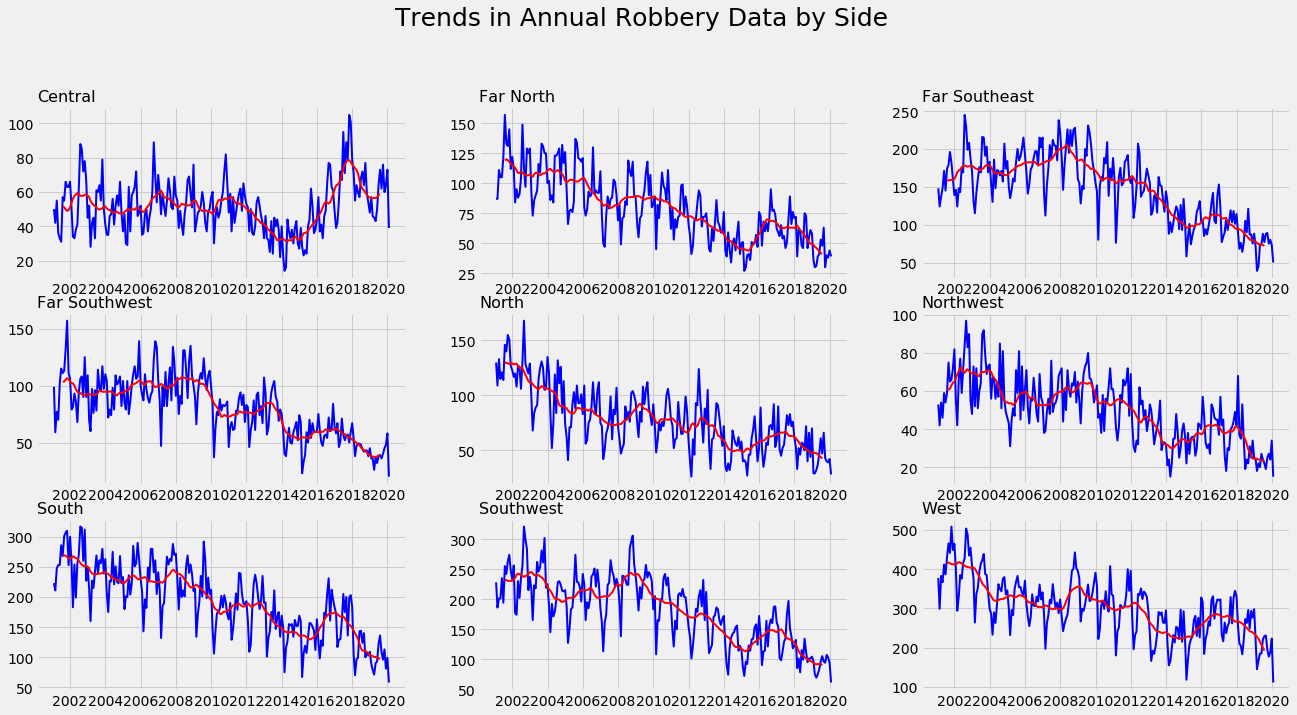

In [102]:
plots.figure(figsize=(20,10))

plots.suptitle("Trends in Annual Robbery Data by Side", fontsize = 25, fontweight = 0, color = 'black', style = 'normal', y=1.02)

# multiple line plot
num=0.0

for column in side_df:
    num+=1
 
    # Find the right spot on the plot
    plots.subplot(3,3, num)
    
    # Get the trend
    decomposition = sm.tsa.seasonal_decompose(side_df[column])
 
    # Plot the lineplot
    plots.plot(side_df.index, side_df[column], linewidth = 2, c='blue')
    plots.plot(decomposition.trend.index, decomposition.trend, linewidth = 2, c='red')
    
    
    # Add title
    plots.title(column, loc='left', fontsize=16, fontweight=0, color='black')

In [103]:
hp_df = r_df[r_df['Community Area'] == 41]

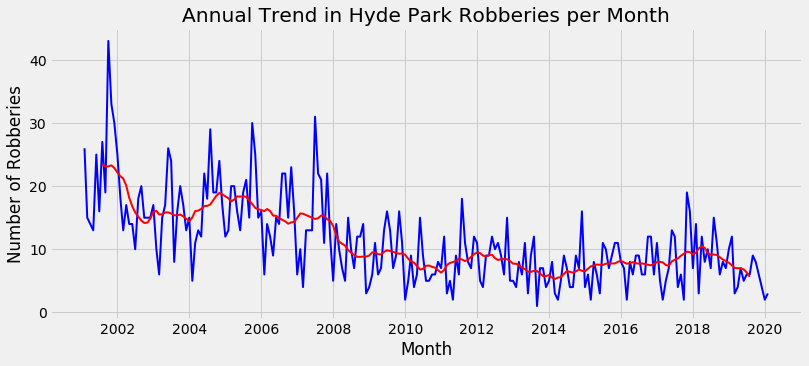

In [104]:
annual_hp_df = hp_df.resample('M').count()['Block']
hp_decomposition = sm.tsa.seasonal_decompose(annual_hp_df)

plots.figure(figsize=(12,5))
plots.plot(annual_hp_df.index, annual_hp_df, linewidth = 2, c='blue')
plots.plot(hp_decomposition.trend.index, hp_decomposition.trend, linewidth = 2, c='red');
plots.xlabel('Month')
plots.ylabel('Number of Robberies')
plots.title('Annual Trend in Hyde Park Robberies per Month');

In looking at the annual trend in Chicago crime data, we see that there is a general decrease in crime from 2001 to 2019 for all 3 crime types. There looks to have been a slight increase in crime from 2014-2016 which is even more prominent if we group the data by side of chicago. Most of the sides follow the same pattern although it is important to note not all with the same values (The West side has far more robberies in general but follows the same general decreasing trend as the others). The exception to this being the Central side of Chicago which actually has seen an increasing trend and saw its peak number of monthly robberies in 2018. Focusing in on Hyde Park, there is a general decrease from 2001 to 2019 just as in the rest of Chicago although not as steep and since 2008 has essentially been level.

## Question 3 - Spacial Trends ##

In [110]:
clean_df = r_df[pd.notnull(r_df['Latitude'])]
clean_df = clean_df.reset_index(drop=True)

table = Table.from_df(clean_df)

heat_map_data = table.select('Latitude', 'Longitude')

temp = list(zip(heat_map_data[0], heat_map_data[1]))

inputs = [list(elem) for elem in temp]

sample = sample(inputs, 45000)

TypeError: 'list' object is not callable

In [112]:
m = folium.Map(location = [41.88, -87.62], zoom_start = 10)
HeatMap(sample, radius = 10, min_opacity = 0.3).add_to(m)

### Heatmap of robberies in Chicago 

In [113]:
m

## Question 4 - Trends of Arrests

In [142]:
grouper = r_df.groupby([pd.Grouper(freq='M'), 'Arrest'])
annual_arrest_df = grouper.count().unstack()['Block']
annual_arrest_df['proportion_arrested'] = annual_arrest_df[1] / (annual_arrest_df[0] + annual_arrest_df[1])
arrest_decomposition = sm.tsa.seasonal_decompose(annual_arrest_df['proportion_arrested'])

side_arrest_df = r_df.groupby(['Side', 'Arrest']).count()['Block'].unstack()
side_arrest_df['proportion_arrested'] = side_arrest_df[1] / (side_arrest_df[0] + side_arrest_df[1])
series = side_arrest_df.sort_values('proportion_arrested')['proportion_arrested']

In [150]:
series[1]

0.08225670471893727

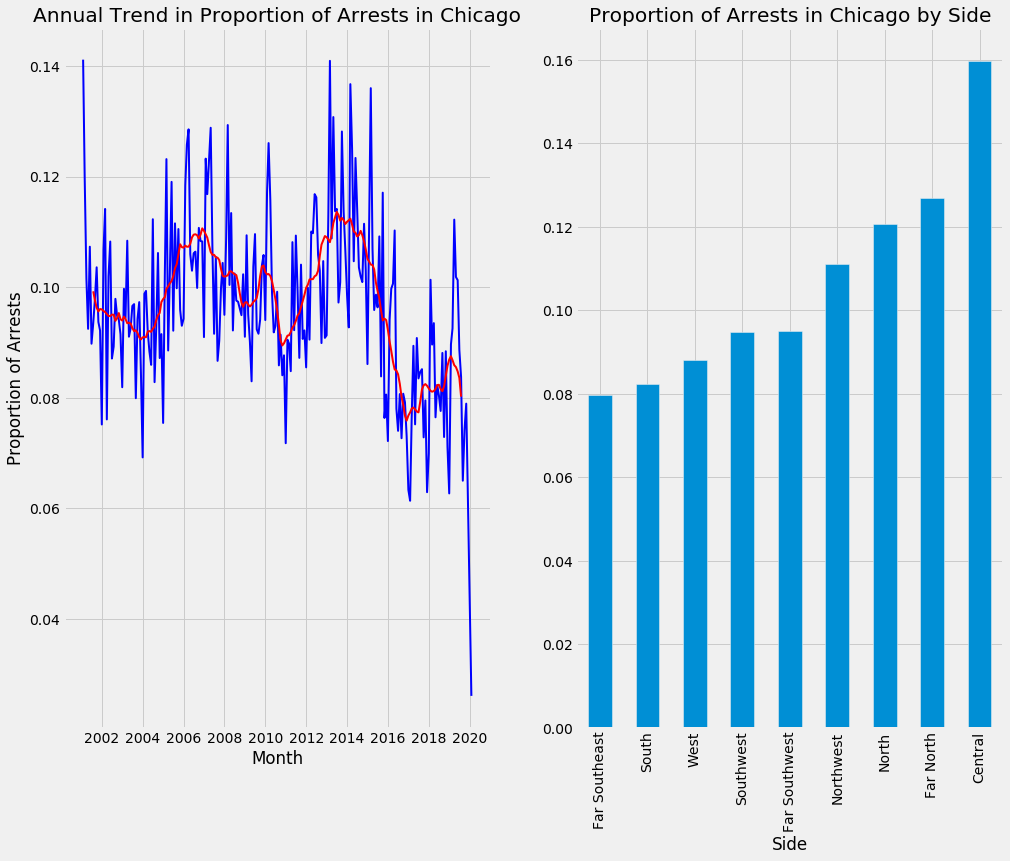

<Figure size 720x720 with 0 Axes>

In [162]:
plots.subplot(1,2,1)

plots.plot(annual_arrest_df.index, annual_arrest_df['proportion_arrested'], linewidth = 2, c='blue')
plots.plot(arrest_decomposition.trend.index, arrest_decomposition.trend, linewidth = 2, c='red');
plots.xlabel('Month')
plots.ylabel('Proportion of Arrests')
plots.title('Annual Trend in Proportion of Arrests in Chicago');

plots.subplot(1,2,2)
series.plot.bar(title = 'Proportion of Arrests in Chicago by Side')

plots.figure(figsize=(10,10));
plots.tight_layout();

There seems to be no trend in proportion of annual arrests in Chicago. There were notable increases in proportion of arrests from 2004-2007 and from 2011-2014 although both of these were followed by periods of decrease in proportion of arrests. In looking at the spacial trends, we see that all of the southside communities have lower proportion of arrests than all of the northside communities. The Central side of chicago has twice the rate of arrests as the Far Southeast does. The data indicates that police districts in the northside communities are much more effective than those in the southside.

## Question 5 - Predicting Robberies in Hyde Park

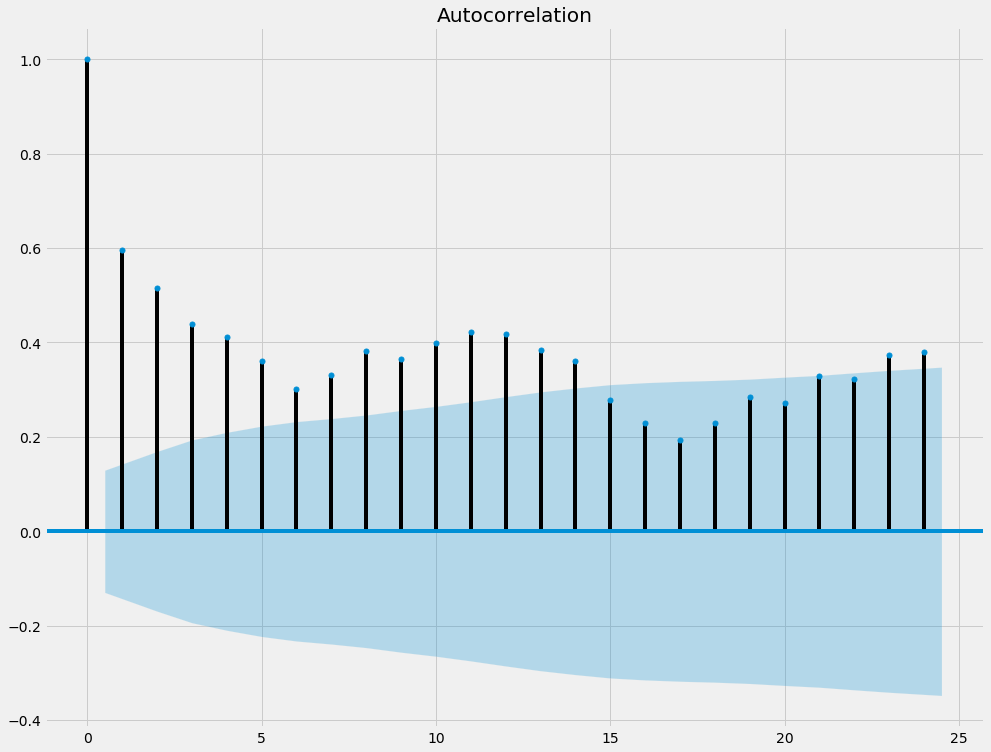

In [167]:
sm.graphics.tsa.plot_acf(annual_hp_df)
plots.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Block   No. Observations:                  228
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -712.465
Method:                       css-mle   S.D. of innovations              5.504
Date:                Wed, 12 Feb 2020   AIC                           1430.930
Time:                        18:22:15   BIC                           1441.218
Sample:                    02-28-2001   HQIC                          1435.081
                         - 01-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0886      0.261     -0.340      0.734      -0.599       0.422
ar.L1.D.Block    -0.4006      0.061     -6.569      0.000      -0.520      -0.281
                                    Root

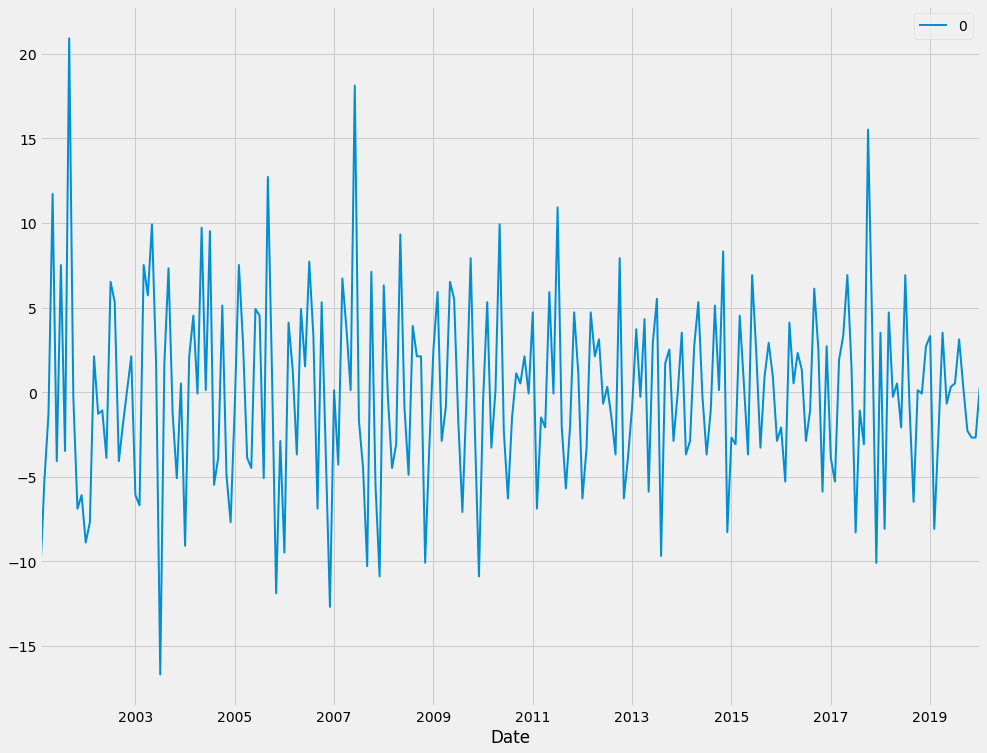

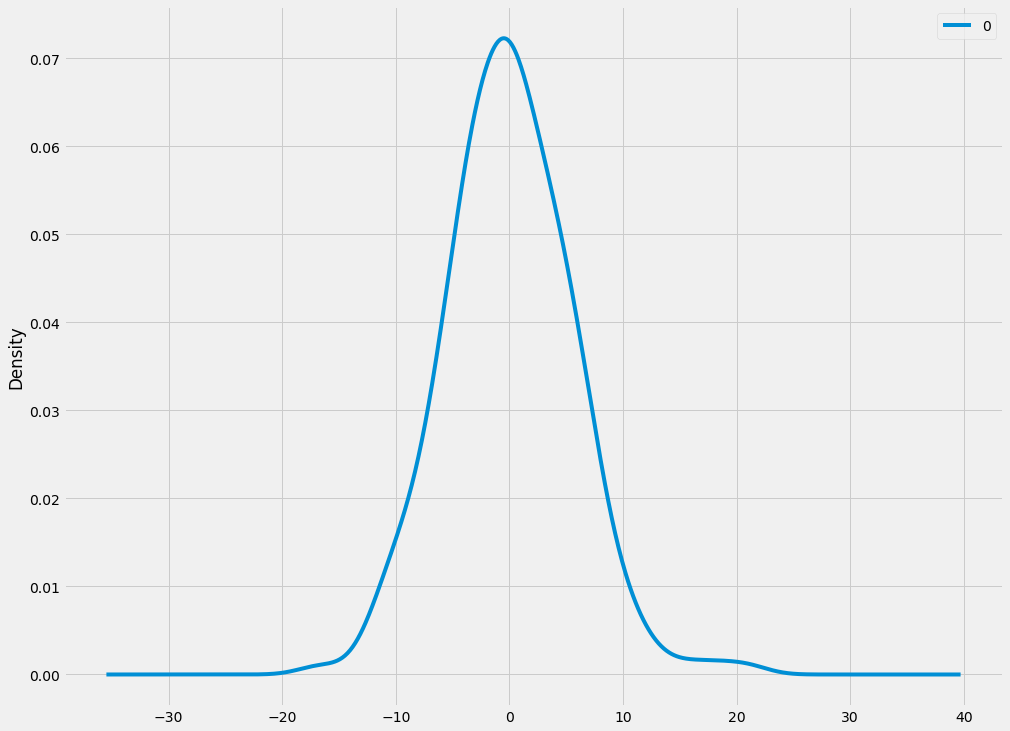

                0
count  228.000000
mean    -0.019170
std      5.523974
min    -16.677100
25%     -3.674986
50%     -0.074845
75%      3.520364
max     20.919518


In [168]:
model = ARIMA(annual_hp_df, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(linewidth = 2)
plots.show()
residuals.plot(kind='kde')
plots.show()
print(residuals.describe())

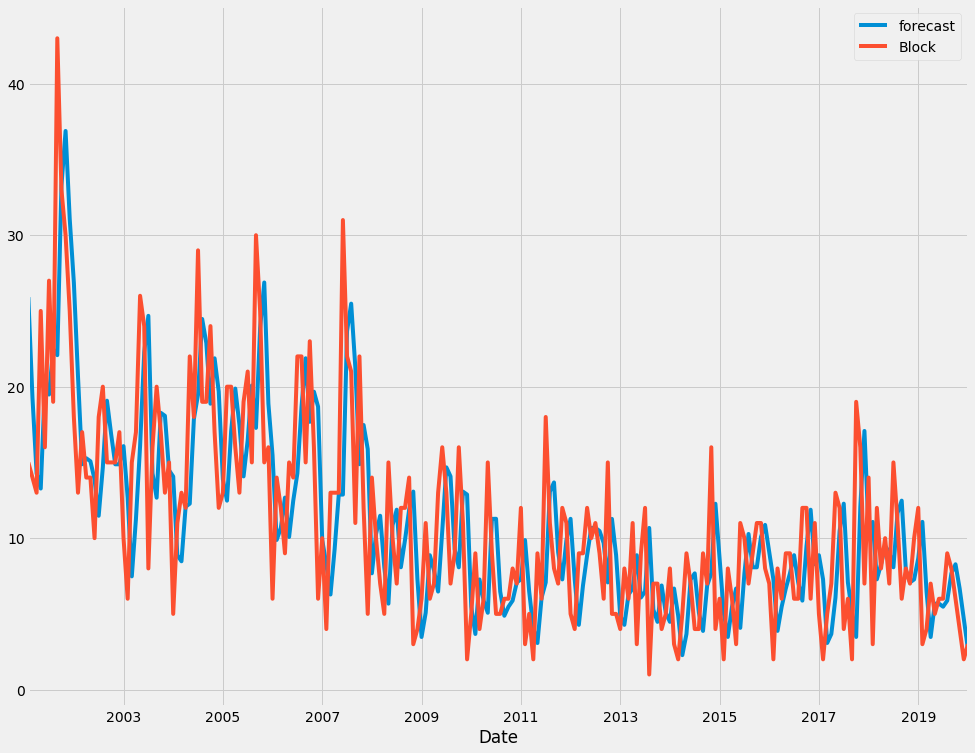

In [172]:
model_fit.plot_predict()
plots.figsize=(7,7)
plots.show()

In [39]:
prediction = model_fit.forecast()[0]
prediction

array([2.47540873])

We used time series forecasting to predict number of robberies in Hyde Park in February. It was evident that the values for monthly robberies were highly autocorrelated and that the most effective predictors would be the number of robberies in Hyde Park in the previous months and years. Ultimately, our model predicted that there would be 2.475 robberies in Hyde Park in February. Rounding down, that would give us a prediction of 2 robberies this month. I think this is reasonable considering the past couple Februaries had around that many. While previous values were by far the best predictors, some other highly correlated values with number of robberies were population, income, and the indicator variable for West side. I find this particularly interesting because the West Side of Chicago is widely regarded as the most dangerous and it was very correlated with number of robberies.

## Question 6 - Exploring linkage between Income and Crime 

Exploring the link between income and crime as well as income and proportion of arrests

In [173]:
# data from: https://github.com/dssg/411-on-311/blob/master/data/chicago-community-areas.csv 
demographic_df = pd.read_csv('chicago-community-areas.txt', header = None)

demographic_df = demographic_df.T

new_header = demographic_df.iloc[0] 

demographic_df = demographic_df[1:] 

demographic_df.columns = new_header

In [174]:
demographic_df['Community Area'] = demographic_df['Community Area'].astype(float)

In [175]:
joined_df = r_df.merge(demographic_df, on = 'Community Area')

In [183]:
series = joined_df.groupby(['income', 'population']).count()['Block']
df = series.reset_index()
df = df.rename(columns = {"Block": "robberies"})
df['population'] = df['population'].astype(float)
df['robberies'] = df['robberies'].astype(float)
df['income'] = df['income'].astype(float)
df['proportion'] = df.apply(lambda row: (row.robberies)/(row.population), axis = 1)
df.sort_values('proportion')

df2 = joined_df.groupby(['income', 'Arrest']).count()['Block'].unstack()
df2 = df2.reset_index()
df2['income'] = df2['income'].astype(float)
df2['proportion'] = df2.apply(lambda row: (row[True])/(row[True] + row[False]), axis = 1)

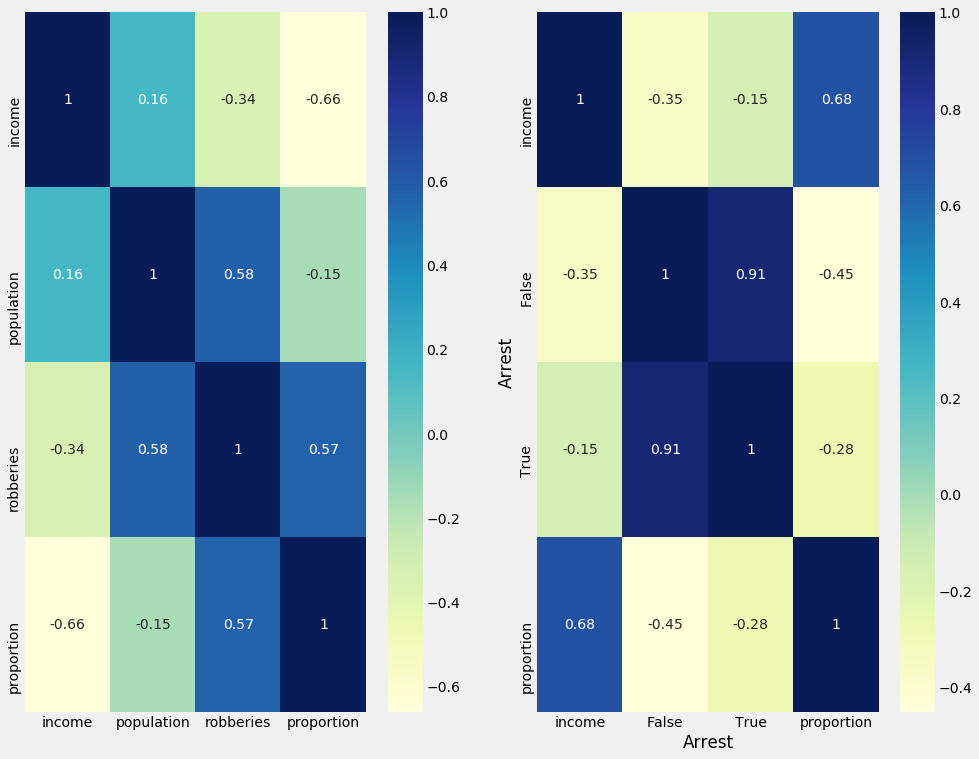

In [186]:

correlation = df.corr()
fig, (ax1, ax2) = plots.subplots(1,2)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='YlGnBu', ax=ax1)

correlation2 = df2.corr()
sns.heatmap(correlation2, xticklabels=correlation2.columns, yticklabels=correlation2.columns, annot=True, cmap='YlGnBu', ax=ax2)

Looking at these correlation plots we see that income is correlated fairly strongly both with number of robberies and number of arrests. However, the strongest correlations come when we look at the proportions of these values. Income is correlated with robbery per capita at a rate of -.66 and with proportion of arrests at a rate of .68. This is very interesting because it tells us that in poorer communities, there is more likely to be a higher crime rate and a lower arrest rate. Also, while population is highly correlated with robberies, income is not highly correlated with population so there is still a strong link between income and amount of robberies as well as robbery per capita and proportion of arrests.